- Tutorial by Misra Turp: https://youtu.be/wxS5P7yDHRA?t=581
- Data from kukuroo3: https://www.kaggle.com/datasets/kukuroo3/body-performance-data

# What is a decision tree model?
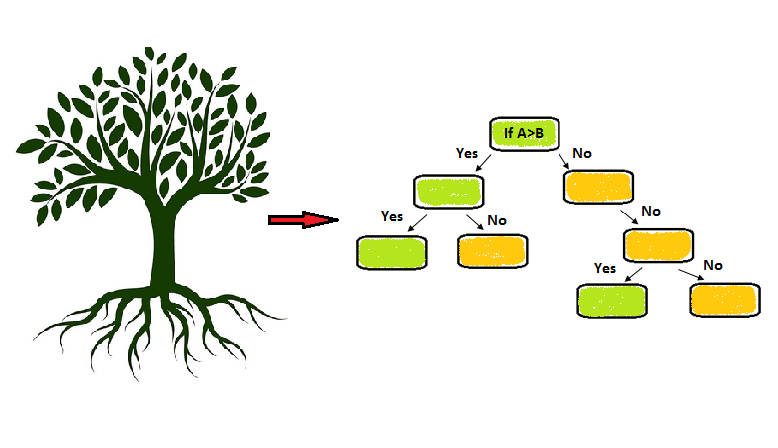
 image credit: https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsai.net%2Fp%2Fmachine-learning%2Ffully-explained-decision-tree-classification-with-python&psig=AOvVaw2OawgimDboIaLl4a8paEI7&ust=1690660244536000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCLCs6sqWsoADFQAAAAAdAAAAABAD

 - supervised learning model for classification and regression of datasets
 - each box or decision node has a certain condition that filters certain data to other nodes

# 1) Import Libraries

In [147]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

# 2) Retrieve Data

For Body Performance (the_class), A is best body performance and D is worst body performance.

### 2a) Pull csv file

In [148]:
data = pd.read_csv("bodyPerformance.csv")
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,the_class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


### 2b)  Data Cleaning: Convert Class of Body Performance (A,B,C) and gender to Numbers (0,1,2)

The learning model will only process integers

In [149]:
integer = preprocessing.LabelEncoder()

the_class = integer.fit_transform(list(data["the_class"]))

the_class

array([2, 0, 2, ..., 0, 3, 2], dtype=int64)

In [150]:
df  = pd.read_csv("bodyPerformance.csv")


#create dictionary to convert letters to numbers for respective columns in dataset
letters_to_num_bodyPerf = {
    "A" : 1,
    "B" : 2,
    "C" : 3,
    "D" : 4,
    
}

gender_to_num = {
    "F" : 0,
    "M" : 1
    
    
}

df['the_class'] = df['the_class'].map(letters_to_num_bodyPerf)
df['gender'] = df['gender'].map(gender_to_num)

#making new file for dataset to use
df.to_csv('modified_bodyPerformance.csv', index=False)

In [151]:
df  = pd.read_csv("modified_bodyPerformance.csv")

#get 1/7 of dataset
partial_data = len(df) // 7
df_half = df[:partial_data]

df_half.to_csv('modified_bodyPerformance.csv', index=False)

## 2c) Open modified file

In [152]:
data = pd.read_csv("modified_bodyPerformance.csv")
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,the_class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1908,29.0,1,180.1,72.40,13.8,91.0,155.0,48.4,15.2,52.0,223.0,1
1909,57.0,0,155.8,52.50,32.3,70.0,135.0,19.3,20.6,28.0,137.0,2
1910,25.0,0,160.2,42.10,17.5,73.0,113.0,21.6,19.1,5.0,124.0,4
1911,28.0,1,177.9,59.70,13.1,90.0,143.0,40.9,23.0,70.0,247.0,1


### 2d) Seperate data into "test" and "train"

In [153]:
from sklearn.model_selection import train_test_split
x_data = df_half.drop(columns=['the_class'])
y_data = df_half["the_class"]
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size = .2)

# 3) Get Decision Tree Model

In [154]:
from sklearn.tree import DecisionTreeClassifier
# my_classifier = DecisionTreeClassifier(max_depth=3)
#ccp_alpha prunes tree
my_classifier = DecisionTreeClassifier(ccp_alpha=.01, max_depth = 3)
my_classifier = my_classifier.fit(X_train,y_train)

In [155]:
my_classifier.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [156]:
#shows us how the decision tree model used our data to produce output
#used 4018 rows for test
X_test

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
595,26.0,0,160.0,62.40,31.3,69.0,118.0,32.5,21.9,42.0,177.0
1667,55.0,1,162.1,69.30,24.9,81.0,147.0,35.1,22.0,30.0,190.0
971,32.0,1,181.0,78.80,17.6,68.0,114.0,49.5,10.6,52.0,182.0
1223,36.0,1,171.0,69.40,9.2,57.0,111.0,52.2,17.0,54.0,238.0
168,22.0,0,162.2,60.40,27.1,74.0,115.0,34.9,22.6,37.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...
1307,47.0,0,163.7,56.80,30.0,82.0,137.0,30.0,27.5,50.0,194.0
1645,21.0,1,175.8,78.80,19.7,61.0,110.0,54.2,19.6,51.0,230.0
803,48.0,1,168.1,68.00,29.3,97.0,149.0,37.0,-0.2,17.0,169.0
255,41.0,1,179.3,73.40,18.0,99.0,150.0,43.3,17.3,47.0,246.0


In [157]:
#see how model predicted body performance
my_predictions = my_classifier.predict(X_test)
my_predictions

array([1, 3, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 2, 1, 2, 2, 3, 4, 3, 2, 3, 3,
       2, 3, 2, 4, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 4, 4, 1, 3, 3, 2, 2, 1,
       4, 1, 1, 4, 2, 3, 3, 3, 1, 3, 3, 2, 1, 3, 3, 1, 4, 3, 4, 3, 3, 2,
       1, 2, 4, 3, 2, 3, 3, 3, 2, 1, 2, 3, 3, 3, 4, 3, 2, 2, 2, 1, 2, 1,
       3, 1, 2, 1, 4, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 1,
       2, 3, 2, 1, 1, 3, 2, 4, 4, 2, 2, 2, 1, 2, 3, 3, 1, 1, 3, 3, 2, 4,
       3, 2, 1, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 2, 4, 2, 1,
       3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2, 4, 2, 3, 1, 4, 2,
       3, 3, 3, 3, 3, 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 4, 3, 1, 3, 2, 3,
       3, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 4, 4, 1, 3, 1, 2, 4, 4, 3, 1,
       4, 3, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 3, 3, 2, 3, 1, 4, 2, 4, 3,
       2, 1, 3, 3, 4, 3, 2, 2, 3, 1, 3, 1, 2, 2, 3, 2, 3, 1, 3, 1, 1, 3,
       4, 1, 3, 4, 1, 3, 3, 4, 3, 3, 3, 2, 2, 3, 4, 2, 2, 3, 3, 2, 3, 3,
       1, 2, 2, 3, 3, 2, 2, 1, 4, 4, 3, 1, 1, 3, 3,

In [158]:
#see how decision tree model makes decision for each node and how sure it is for making decision
my_classifier.predict_proba(X_test)

array([[0.60362694, 0.22797927, 0.12435233, 0.04404145],
       [0.17592593, 0.30555556, 0.33333333, 0.18518519],
       [0.24099099, 0.37162162, 0.32432432, 0.06306306],
       ...,
       [0.        , 0.        , 0.04487179, 0.95512821],
       [0.24099099, 0.37162162, 0.32432432, 0.06306306],
       [0.24099099, 0.37162162, 0.32432432, 0.06306306]])

My "Body Performance" label has 4 categories for the model to categorize the test data in - 1,2,3,or 4. Each column of the array represents each of those numbers to the respective columns.

- if we change the number of decision nodes for the decision tree to evaluate what category each data point goes in, it becomes less certain about which category to choose. The more decision nodes the more accurate.

- the larger the test size, the more accurate

# 4) Evaluate Model's Performance

## 4a) Model's accuracy

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, my_predictions)

0.4934725848563969

## 4b) Confusion Matrix
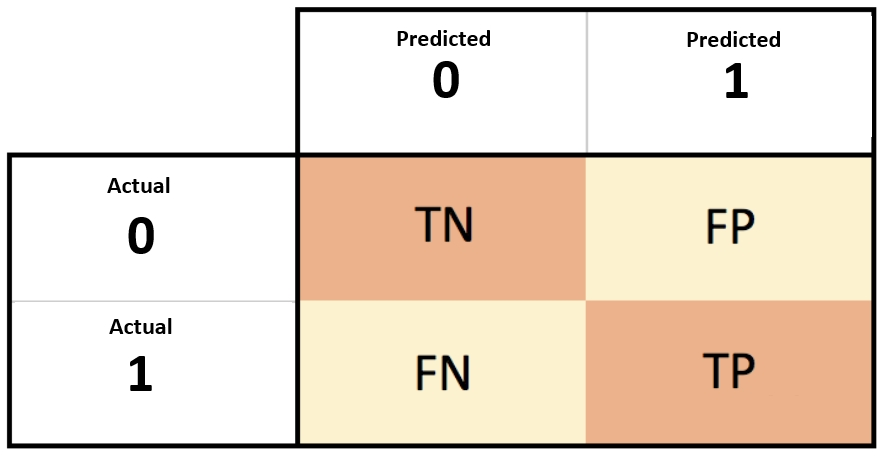

This shows how the model correctly/incorrectly categorized data it predicted and how it compares to the actual lable for the data used

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, my_predictions, labels= [1,2,3,4])

array([[47, 29, 12,  0],
       [27, 39, 25,  1],
       [13, 23, 64,  4],
       [ 8, 13, 39, 39]], dtype=int64)

# X O O O
# O X O O
# O O X O
# O O O X

### Any spot where X is means the model predicted correctly for x number of data points

## 4c) Precision score

For average parameter:

- None: This is the default setting. It will calculate the precision for each class separately and return an array of precision scores for each class.

- 'micro': Calculate the precision globally by counting the total true positives, false positives, and false negatives for all classes together.

- 'macro': Calculate the precision for each class separately and then take the unweighted average (mean) of the precision scores. Each class is given equal importance.

- 'weighted': Calculate the precision for each class separately and then take the average, weighted by the number of samples in each class. This is useful when you have imbalanced class distributions.

- .2f -> this prints out a float rounded to 2 decimal places for the precision score

In [161]:
from sklearn.metrics import precision_score

the_precision = precision_score(y_test, my_predictions,average="micro")
print("Precision: {:f}".format(the_precision))

#error I ran into- value error where  Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Precision: 0.493473


## 4d) Recall score

This determines the ratio of true positives divided by the actual positive values, so it measures how well the models predicts values.

In [162]:
from sklearn.metrics import recall_score

recall_prediction = recall_score(y_test, my_predictions,average="micro")
print("Recall score: {:f}".format(recall_prediction))

Recall score: 0.493473


## 4e) Classification Report

- This tells us three things: precision, recall, and F1 score
- The support column shows how many items actually belong in a specific category

F1 score
- the closer value is to 1, the better the model
- calculate using formula: 2* (Precision * Recall)/ (Precision + Recall)

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test, my_predictions, target_names=["A","B","C","D"]))

#use print function for better formatting

              precision    recall  f1-score   support

           A       0.49      0.53      0.51        88
           B       0.38      0.42      0.40        92
           C       0.46      0.62      0.52       104
           D       0.89      0.39      0.55        99

    accuracy                           0.49       383
   macro avg       0.55      0.49      0.50       383
weighted avg       0.56      0.49      0.50       383



# 5) Evaluate Each Feature's Importance in Model

In [164]:
#get column names as variable
my_features_names = x_data.columns
my_features_names

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [165]:
#create neatly formatted dataframe of column names with their importance value

pd_features = pd.DataFrame(my_classifier.feature_importances_, index = my_features_names)
#issue: 0 was column name, use rename to replace title
pd_features.rename(columns = {0 : "Importance Value"},
                  inplace = True)
pd_features

,Importance Value
age,0.000000
gender,0.000000
height_cm,0.000000
weight_kg,0.000000
body fat_%,0.112721
diastolic,0.000000
systolic,0.000000
gripForce,0.000000
sit and bend forward_cm,0.744376
sit-ups counts,0.142903


<Axes: title={'center': 'Measure of Importance Value for Features'}, xlabel='Features', ylabel='Importance Value'>

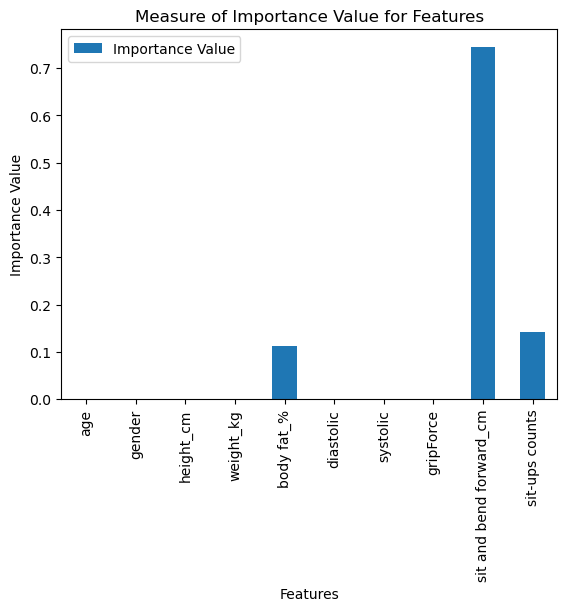

In [166]:
#Make matplot chart with feature_importance data

pd_features.head(10).plot(kind="bar", xlabel = "Features", ylabel = "Importance Value", title = "Measure of Importance Value for Features")


# 6) Decision Tree Visual Model

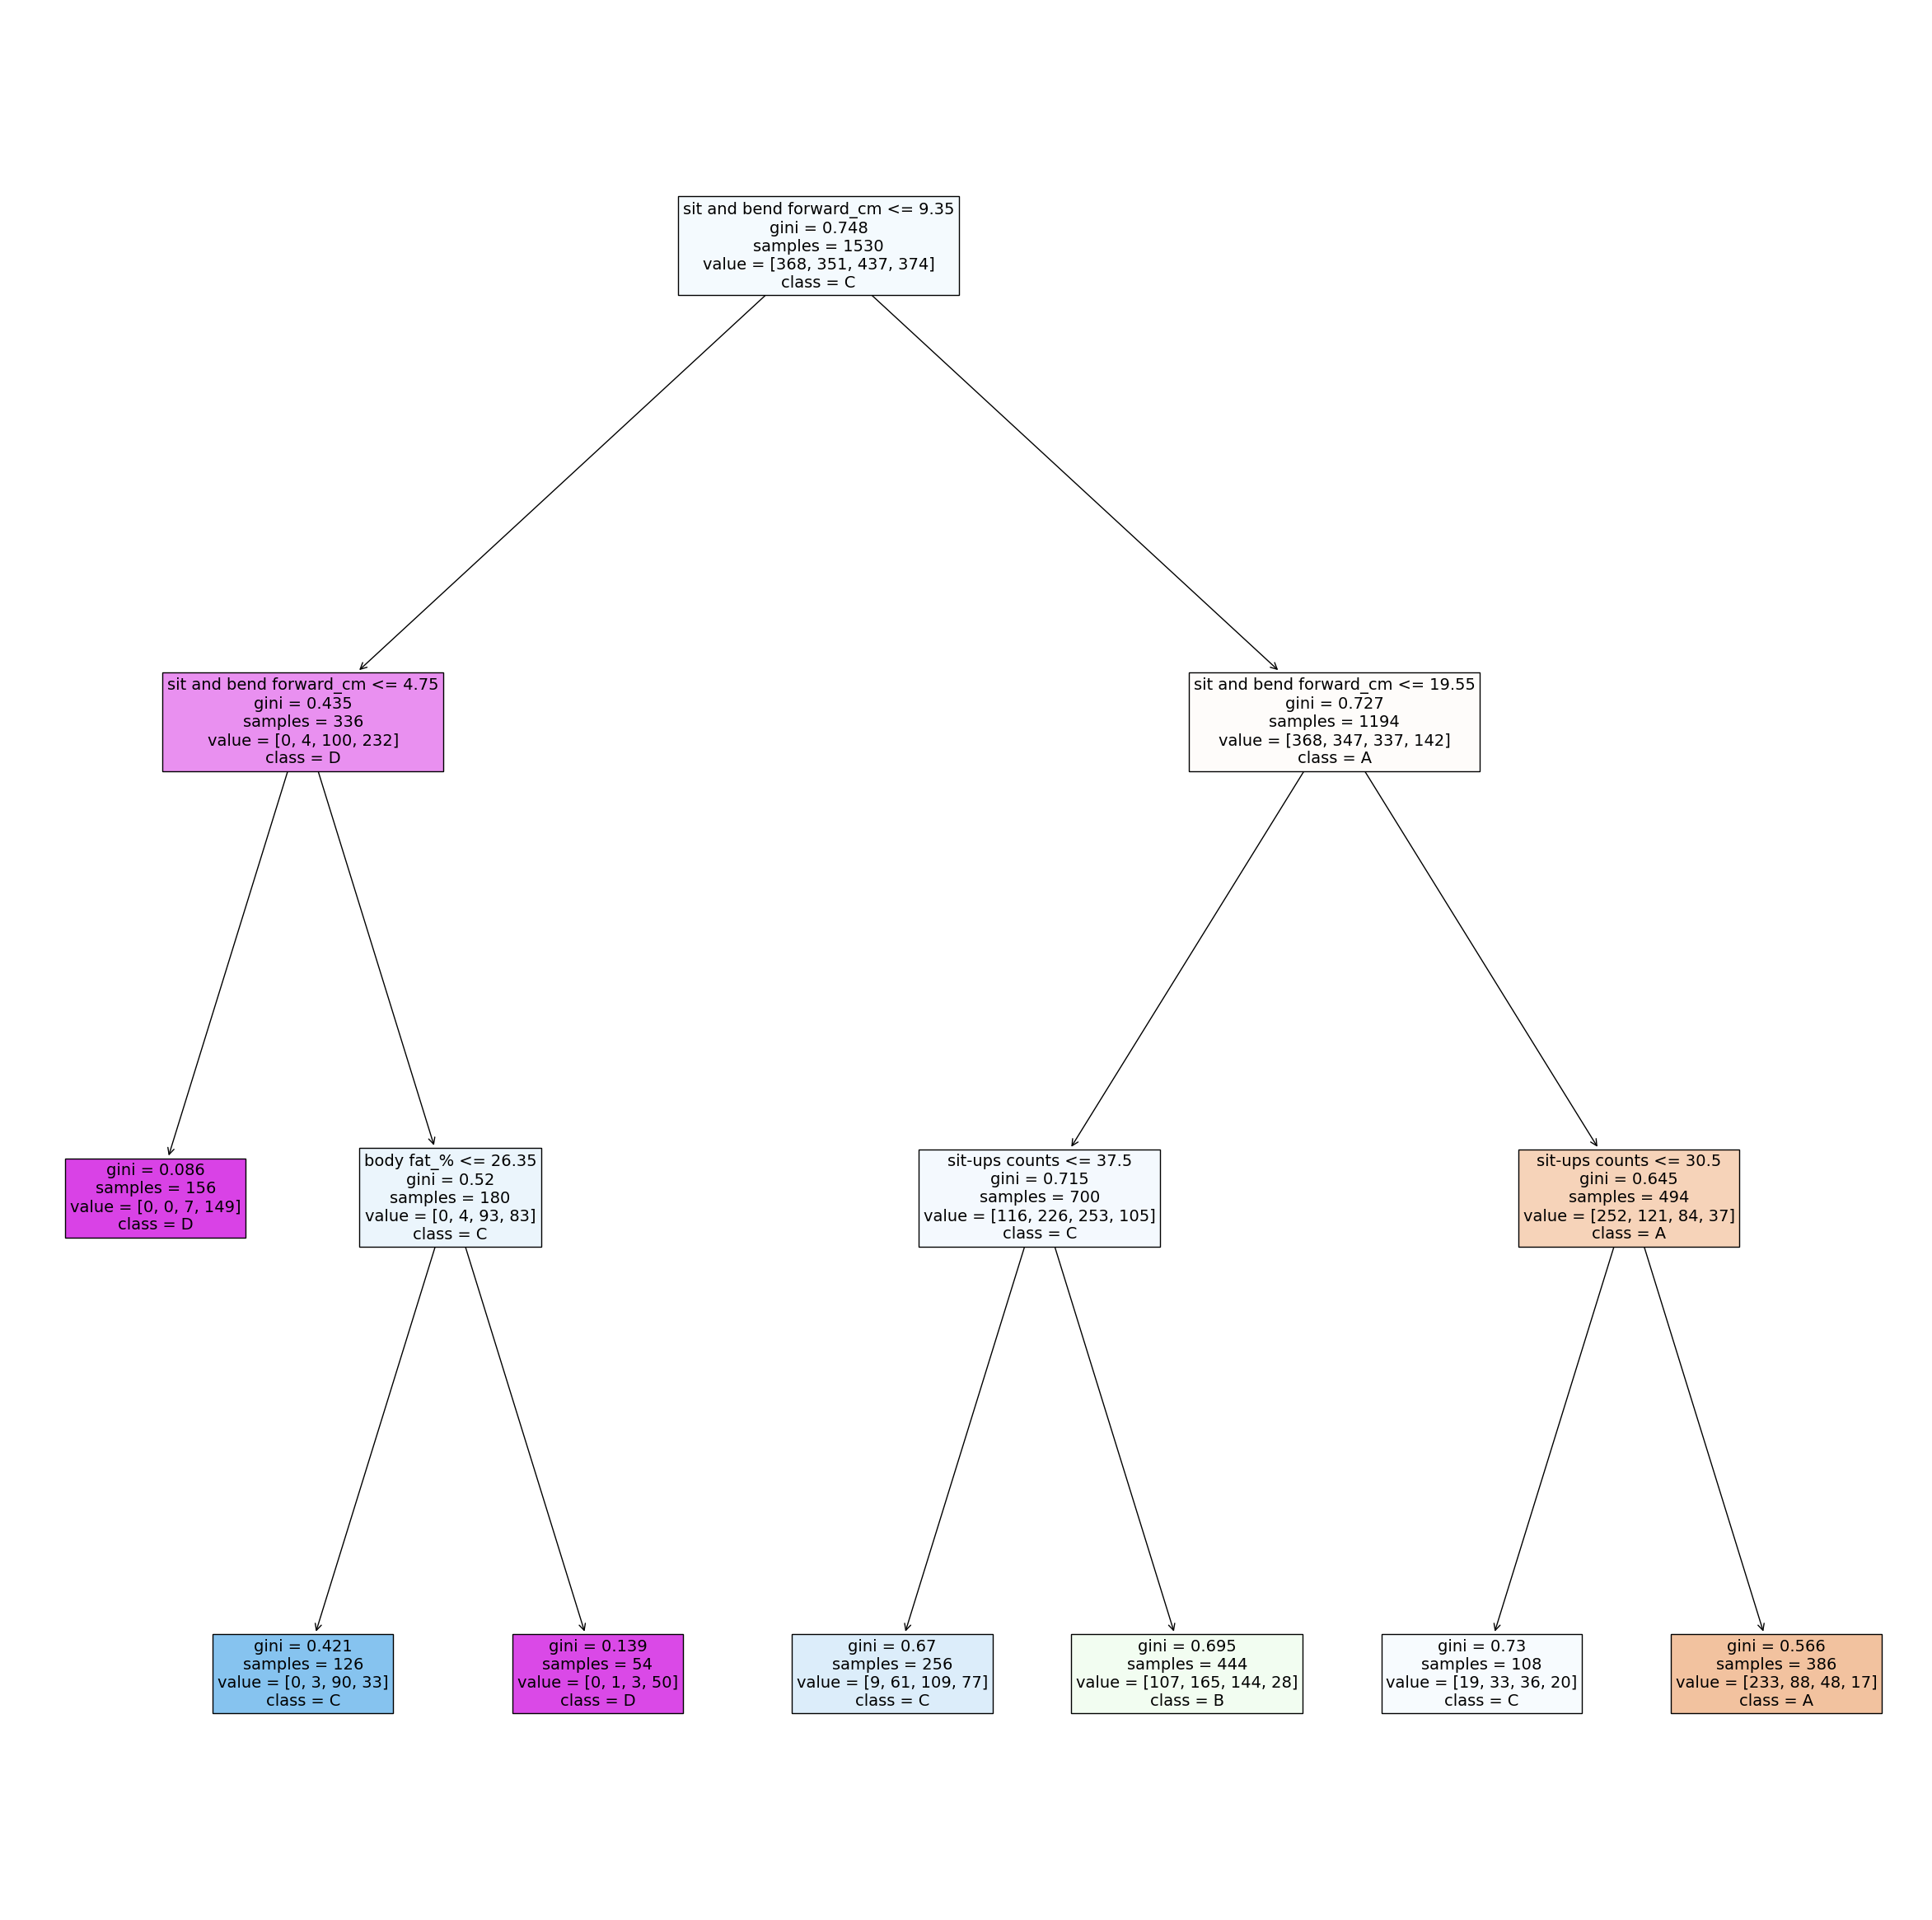

In [167]:
from sklearn import tree
from matplotlib import pyplot as plt

#error fixed: have to start at index 0 for labelling body performance for trtee
my_figure = plt.figure(figsize=(30,30))
_ = tree.plot_tree(my_classifier,
                  feature_names=my_features_names,
                  class_names={0:"A",1:"B",2:"C",3:"D"},
                  filled = True,
                  fontsize=14)